In [1]:
# first approach is pure machine learning
# td-idf + ML model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [2]:
# load data
data = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
data.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [3]:
# lets one hot encode Y , spam 0 , ham 1
data['v1'][data['v1'] == 'spam'] = 0
data['v1'][data['v1'] == 'ham'] = 1

# next apply feature vectoriser
vectoriser = TfidfVectorizer()
X = vectoriser.fit_transform(data['v2'])

Y = data['v1'].to_numpy().astype('int32')

print(X.shape,Y.shape)

(5572, 8672) (5572,)


In [4]:
# so we see that we obtained an NxD matrix
# now we can apply whatever ML model we want

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y)

In [5]:
# now lets try MLP , we might as well try any other model (may need to remove the verbose argument)
model = MLPClassifier(verbose=True)
model.fit(Xtrain,Ytrain)

Iteration 1, loss = 0.69376957
Iteration 2, loss = 0.47757896
Iteration 3, loss = 0.30308636
Iteration 4, loss = 0.19320423
Iteration 5, loss = 0.12773844
Iteration 6, loss = 0.08901944
Iteration 7, loss = 0.06555243
Iteration 8, loss = 0.05040175
Iteration 9, loss = 0.03989948
Iteration 10, loss = 0.03241361
Iteration 11, loss = 0.02674813
Iteration 12, loss = 0.02249330
Iteration 13, loss = 0.01913207
Iteration 14, loss = 0.01655244
Iteration 15, loss = 0.01433645
Iteration 16, loss = 0.01258816
Iteration 17, loss = 0.01115760
Iteration 18, loss = 0.00997046
Iteration 19, loss = 0.00892030
Iteration 20, loss = 0.00806005
Iteration 21, loss = 0.00727705
Iteration 22, loss = 0.00664896
Iteration 23, loss = 0.00607097
Iteration 24, loss = 0.00559288
Iteration 25, loss = 0.00515432
Iteration 26, loss = 0.00477879
Iteration 27, loss = 0.00444987
Iteration 28, loss = 0.00415764
Iteration 29, loss = 0.00390069
Iteration 30, loss = 0.00366341
Iteration 31, loss = 0.00345416
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [6]:
print('score: ',model.score(Xtest,Ytest))

score:  0.9849246231155779


In [7]:
# now lets create a wordcloud
# basically that is a picture where more frequent pictures appear larger 
# and less frequent words appear smaller
# we want to know the most common words in spam/ham messages

def plot_word_cloud(X):
    # we just need to concatenate all messages togehter
    words = ''
    for message in X:
        words += message.lower() + ' '
    
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Spam messages :


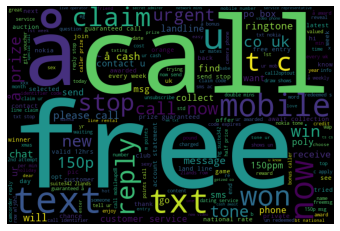

Ham messages :


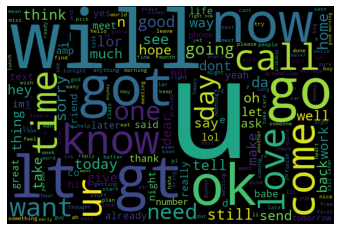

In [8]:
spam_messages = data['v2'][data['v1'] == 0]
ham_messages = data['v2'][data['v1'] == 1]

print('Spam messages :')
plot_word_cloud(spam_messages)
print('Ham messages :')
plot_word_cloud(ham_messages)

In [9]:
# next is a Deep learning approach
# Embeddings + LSTMs

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D,Embedding,SimpleRNN,LSTM,GRU
from tensorflow.keras.models import Model

In [11]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')
data.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [12]:
X = data['v2'].to_numpy()
Y = data['v1'].to_numpy()

In [13]:
# lets one hot encode Y , spam 0 , ham 1
spam = Y == 'spam'
ham = np.logical_not(spam)
Y[spam] = 0
Y[ham] = 1

In [14]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.33)

In [15]:
# next lets begin processing X
# first we tokenise
MAX_VOCAB_SIZE = 20000
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser.fit_on_texts(Xtrain)
Xtrain = tokeniser.texts_to_sequences(Xtrain)
Xtest = tokeniser.texts_to_sequences(Xtest)

# also get word2idx
word2idx = tokeniser.word_index
V = len(word2idx)  # vocabulary size

In [16]:
# next is padding
Xtrain = pad_sequences(Xtrain)
# get sequence length , the default is the max sequence length
T = Xtrain.shape[1]
# apply same padding on Xtest
Xtest = pad_sequences(Xtest,maxlen=T)

In [17]:
D = 20
M = 15

i = Input(shape=(T,))
# our vocabulary is of size V
# we have an extra token for padding
# so thats V+1
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [18]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [19]:
Ytrain = Ytrain.astype('uint8')
Ytest = Ytest.astype('uint8')

In [20]:
r = model.fit(Xtrain,Ytrain,epochs=10,validation_data=(Xtest,Ytest))

Epoch 1/10
117/117 [==============================] - 17s 69ms/step - loss: 0.5639 - accuracy: 0.8352 - val_loss: 0.3760 - val_accuracy: 0.8690
Epoch 2/10
117/117 [==============================] - 5s 39ms/step - loss: 0.3683 - accuracy: 0.8601 - val_loss: 0.3139 - val_accuracy: 0.8690
Epoch 3/10
117/117 [==============================] - 5s 39ms/step - loss: 0.3086 - accuracy: 0.8635 - val_loss: 0.2815 - val_accuracy: 0.8690
Epoch 4/10
117/117 [==============================] - 5s 39ms/step - loss: 0.2689 - accuracy: 0.8650 - val_loss: 0.2321 - val_accuracy: 0.8690
Epoch 5/10
117/117 [==============================] - 5s 39ms/step - loss: 0.1999 - accuracy: 0.8808 - val_loss: 0.1710 - val_accuracy: 0.9625
Epoch 6/10
117/117 [==============================] - 5s 39ms/step - loss: 0.1424 - accuracy: 0.9801 - val_loss: 0.1225 - val_accuracy: 0.9761
Epoch 7/10
117/117 [==============================] - 5s 39ms/step - loss: 0.0885 - accuracy: 0.9892 - val_loss: 0.0946 - val_accuracy: 0.982

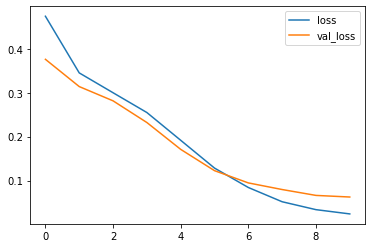

In [21]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

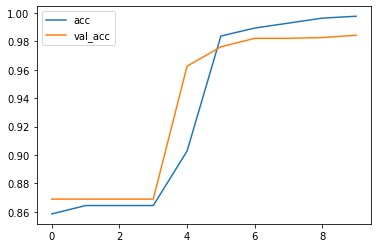

In [22]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [23]:
# again, another Deep learning approach
# this time with CNNs

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D,Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [25]:
MAX_VOCAB_SIZE = 20000
D = 20
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10

In [26]:
# first lets load in data and take a look at it
data = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
data.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [27]:
X = data['v2'].to_numpy()
Y = data['v1'].to_numpy()


# lets one hot encode Y , spam 0 , ham 1
spam = Y == 'spam'
ham = np.logical_not(spam)
Y[spam] = 0
Y[ham] = 1


Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.33)

In [28]:
# next lets begin processing X
# first we tokenise
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser.fit_on_texts(Xtrain)
Xtrain = tokeniser.texts_to_sequences(Xtrain)
Xtest = tokeniser.texts_to_sequences(Xtest)

In [29]:
# also get word2idx
word2idx = tokeniser.word_index
V = len(word2idx)  # vocabulary size
# next is padding
Xtrain = pad_sequences(Xtrain)
# get sequence length , the default is the max sequence length
T = Xtrain.shape[1]
# apply same padding on Xtest
Xtest = pad_sequences(Xtest,maxlen=T)

In [30]:
# Input shape now is NxT
# so at each time step we have index of a word
i = Input(shape=(T,))
x = Embedding(V+1,D)(i) # NxTxD
x = Conv1D(128,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)
# here we have a GlobalMaxPooling
# this means we have a time series and wedont care how long it is
# just take the max value in time series in each dimension
# so if the input is of size TxM , the output is of size M
# we can think of this as choosing which point of time was the most important for computing the output
x = GlobalMaxPooling1D()(x)
x = Dense(128,activation='relu')(x)
# we are doing 6 seperate binary classifications
o = Dense(1,activation='sigmoid')(x)

model = Model(i,o)

In [31]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [32]:
Ytrain = Ytrain.astype('uint8')
Ytest = Ytest.astype('uint8')

In [33]:
r = model.fit(Xtrain,Ytrain,epochs=10,validation_data=(Xtest,Ytest))

Epoch 1/10
117/117 [==============================] - 8s 36ms/step - loss: 0.4320 - accuracy: 0.8614 - val_loss: 0.1548 - val_accuracy: 0.9440
Epoch 2/10
117/117 [==============================] - 3s 27ms/step - loss: 0.0695 - accuracy: 0.9765 - val_loss: 0.0698 - val_accuracy: 0.9815
Epoch 3/10
117/117 [==============================] - 3s 28ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0573 - val_accuracy: 0.9880
Epoch 4/10
117/117 [==============================] - 3s 28ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0546 - val_accuracy: 0.9880
Epoch 5/10
117/117 [==============================] - 3s 28ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0727 - val_accuracy: 0.9891
Epoch 6/10
117/117 [==============================] - 4s 31ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.0766 - val_accuracy: 0.9891
Epoch 7/10
117/117 [==============================] - 3s 28ms/step - loss: 2.7385e-04 - accuracy: 0.9999 - val_loss: 0.0904 - val_accuracy: 0.

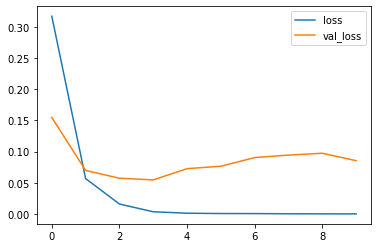

In [34]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

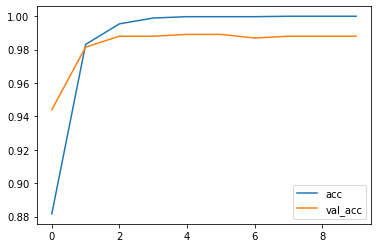

In [35]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()